In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [2]:
# Read the data
path_to_runs = Path("../../results/simulations/actors_labelling/")
print(path_to_runs.resolve())
print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve(), drop_duplicates=True)
print(len(start_data_df_full), len(proposal_df_full), len(timestep_data_df_full))

/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling
True
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling/batch_a0680e42f6514f03b5f1dfe83cdaf57e07bc4644946544dd02afdef809832b4e-75
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling/batch_289949eb5d5ab0b07f11345e0d66e5b46de45c0b79eadbc379c2ecd335c99530-75
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling/batch_0284a9ff0fa4411a834996155d62bb91c09b700e5d194f332a50f58a2a9f1ac8-75
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling/batch_da090f6346cfc23d843e602e46715c29c443e981663c84da2a01ef376f86a189-75
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling/batch_47557e3f1c6d2836a2996be1807caab34fd49045ea2d19a0007cf810d5dbbc8c-75
/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/actors_labelling/batch_2b2

In [3]:
from experiments.analysis_utils.metrics import analyze_veto_timing_by_seals

veto_stats = analyze_veto_timing_by_seals(timestep_data_df_full, start_data_df_full, additional_columns=('determining_factor',))
veto_stats['attack_success_rate'] = 100 - veto_stats['veto_rate']
veto_stats['n_successful_attacks'] = veto_stats['attack_success_rate'] / 100 * veto_stats['total_runs']
print("Veto statistics by seal parameters:")
display(veto_stats)

Veto statistics by seal parameters:


veto_rate  \
first_seal_rage_quit_support second_seal_rage_quit_support determining_factor               
0.01                         0.1                           40                    0.400000   
                                                           43                    1.400000   
                                                           46                    5.454545   
                                                           49                   14.545455   
                                                           52                   31.616162   
                                                           55                   53.939394   
                                                           58                   74.400000   
                                                           61                   89.300000   
                                                           64                   95.900000   
                                                           67                   98.300000   
                                                           70                   99.081633   
                                                           73                   99.897959   
                                                           76                  100.000000   

                                                                               mean_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support determining_factor                      
0.01                         0.1                           40                          38.500000   
                                                           43                          37.142857   
                                                           46                          36.518519   
                                                           49                          36.055556   
                                                           52                          35.584665   
                                                           55                          34.807116   
                                                           58                          34.008065   
                                                           61                          32.967525   
                                                           64                          31.946820   
                                                           67                          30.970498   
                                                           70                          30.178167   
                                                           73                          29.481103   
                                                           76                          28.925510   

                                                                               median_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support determining_factor                        
0.01                         0.1                           40                                 38.0   
                                                           43                                 37.0   
                                                           46                                 36.0   
                                                           49                                 36.0   
                                                           52                                 35.0   
                                                           55                                 35.0   
                                                           58                                 34.0   
                                                           61                                 32.0   
                                                           64                                 32.0   
                                                           67

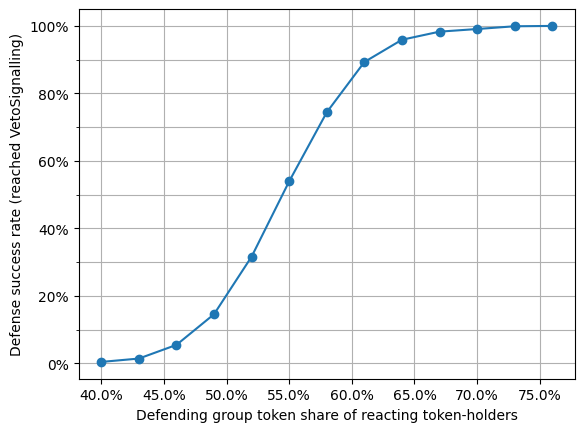

In [4]:
plt.plot(veto_stats.reset_index()['determining_factor'], veto_stats.reset_index()['veto_rate'], marker='o')
plt.xlabel('Defending group token share of reacting token-holders')
plt.ylabel('Defense success rate (reached VetoSignalling)')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(100))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(100))
plt.gca().yaxis.set_minor_locator(plt.matplotlib.ticker.AutoMinorLocator(2))
plt.grid(which='both')
plt.show()

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:398: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.0f}%' for x in current_values])
/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:400: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.grid(True)


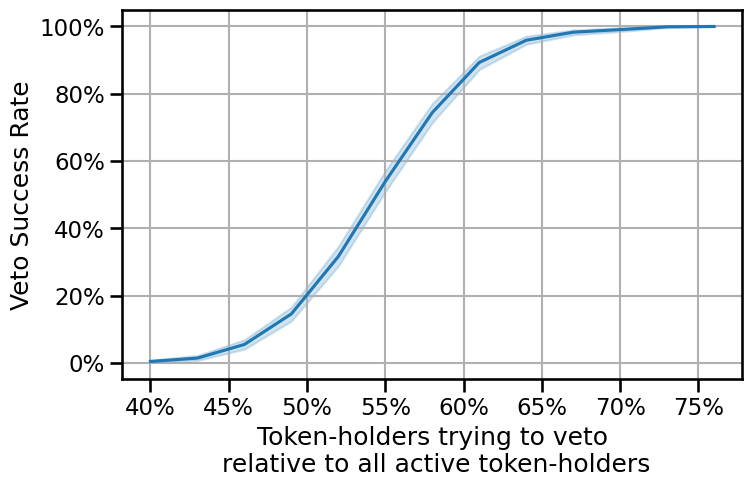

In [12]:
from experiments.analysis_utils.visualization import plot_veto_success_rate_by_column
plot_veto_success_rate_by_column(timestep_data_df_full, start_data_df_full, 'determining_factor', 'Token-holders trying to veto\n relative to all active token-holders')


In [22]:
timestep_data_df_full_with_params = timestep_data_df_full.merge(start_data_df_full[['run_id', 'determining_factor']], on='run_id')
timestep_data_df_first_timestep = timestep_data_df_full_with_params[timestep_data_df_full_with_params['timestep'] == 1]
timestep_data_df_first_timestep['normal_share']  = timestep_data_df_first_timestep.balance_Normal / timestep_data_df_first_timestep.actors_total_balance
timestep_data_df_first_timestep['quick_share'] = timestep_data_df_first_timestep.balance_Quick / timestep_data_df_first_timestep.actors_total_balance
timestep_data_df_first_timestep['normal_defending_share'] = timestep_data_df_first_timestep.normal_share * timestep_data_df_first_timestep.determining_factor / 100

/tmp/ipykernel_6142/1927607829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestep_data_df_first_timestep['normal_share']  = timestep_data_df_first_timestep.balance_Normal / timestep_data_df_first_timestep.actors_total_balance
/tmp/ipykernel_6142/1927607829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestep_data_df_first_timestep['quick_share'] = timestep_data_df_first_timestep.balance_Quick / timestep_data_df_first_timestep.actors_total_balance
/tmp/ipykernel_6142/1927607829.py:5: Settin

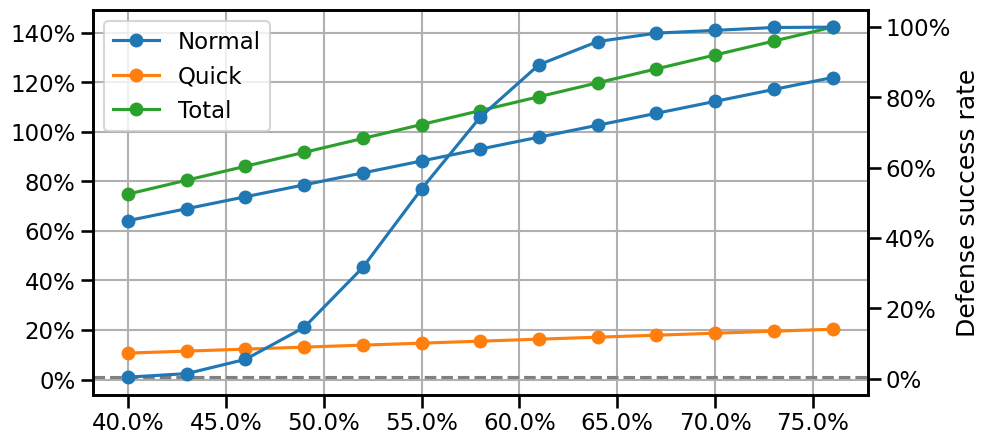

In [65]:
import seaborn as sns
import numpy as np
mean_normal_share = timestep_data_df_first_timestep.normal_share.mean()
mean_quick_share = timestep_data_df_first_timestep.quick_share.mean()
determining_factor = np.array(sorted(timestep_data_df_first_timestep.determining_factor.unique()))
plt.figure(figsize=(10, 5))
plt.plot(determining_factor, mean_normal_share * determining_factor / 100 / 0.01, marker='o', label='Normal')
plt.plot(determining_factor, mean_quick_share * determining_factor / 100 / 0.01, marker='o', label='Quick')
plt.plot(determining_factor, (mean_quick_share + mean_normal_share) * determining_factor / 100 / 0.01, marker='o', label='Total')
plt.legend()
plt.gca().set_xticks(np.arange(min(determining_factor), max(determining_factor), 5))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(100))
xlim = plt.gca().get_xlim()
plt.plot(xlim, [0.01, 0.01], linestyle='--', color='gray')
plt.gca().set_xlim(xlim)
plt.grid()

ax2 = plt.gca().twinx()
ax2.plot(veto_stats.reset_index()['determining_factor'], veto_stats.reset_index()['veto_rate'], marker='o')
ax2.set_ylabel('Defense success rate')
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(100))

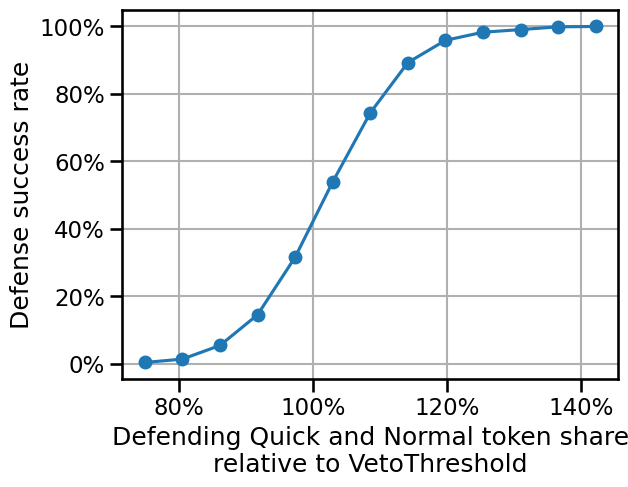

In [63]:
plt.plot((mean_quick_share + mean_normal_share) * determining_factor / 100 / 0.01, veto_stats.reset_index()['veto_rate'], marker='o')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(100))
plt.xlabel('Defending Quick and Normal token share\nrelative to VetoThreshold')
plt.ylabel('Defense success rate')
plt.grid()

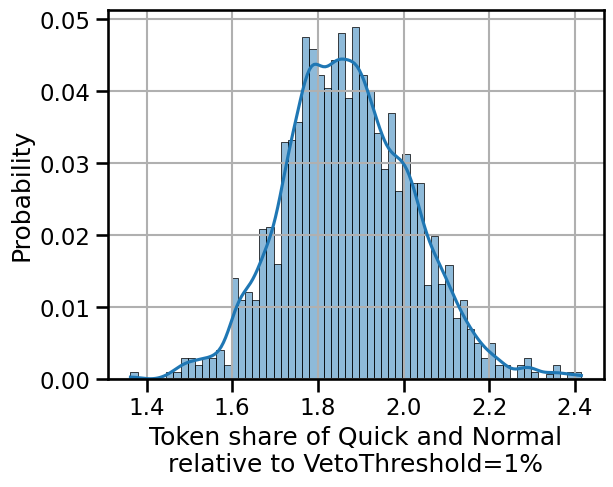

In [73]:
sns.histplot((timestep_data_df_first_timestep.normal_share + timestep_data_df_first_timestep.quick_share) / 0.01, kde=True, stat='probability')
plt.xlabel('Token share of Quick and Normal\nrelative to VetoThreshold=1%')
plt.grid()


In [10]:
# Get counts of rows for each (determining_factor, seed) pair
counts = start_data_df_full.groupby(['determining_factor', 'seed']).size()
# Filter to only show groups with count > 1 (non-unique rows)
non_unique_rows = counts[counts > 1]
if len(non_unique_rows) > 0:
    print("Found non-unique rows:")
    display(non_unique_rows)
else:
    print("All rows are uniquely defined by determining_factor and seed")

Found non-unique rows:


determining_factor  seed
40                  34      4
                    67      4
                    134     4
                    167     4
                    234     4
                           ..
67                  686     4
                    743     4
                    829     4
                    886     4
                    943     4
Length: 100, dtype: int64

In [12]:
print(len(start_data_df_full.drop('run_id', axis=1)))
print(len(start_data_df_full.drop('run_id', axis=1).drop_duplicates()))

13200
12900


In [27]:
import numpy as np
np.arange(40,79,3)
len([40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76])

13

Now what experiments should we do? I propose binary search approach. Assume we want to find counter_label_percentage=H such that veto_rate is 0%. We know that at H=0 veto_rate is 100%. We also know that at H=100 veto_rate is 0%. You've already tried H=50 and veto_rate was >0%. So we should try H=75. If veto_rate at H=75 is still >0% we should try H=87.5. And so on until we find the value of H where veto_rate is 0%.

Similarly, we can find the value of L such that veto_rate is 100%. We know that at L=0 veto_rate is 100%, and at L=50 veto_rate is <100%. So we should try L=25. If veto_rate at L=25 is still <100% we should try L=12.5. And so on until we find the value of L where veto_rate is 100%.